## *Import Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## *Load Cleaned Data*

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('flight_data_cleaned.csv')

In [4]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,25.0,1.0,1.0,1100-1159,30.0,1235.0,1311.0,4.0,1250,1315.0,25.0,25.0,1.0,1.0,1200-1259,0.0,0.0,70.0,70.0,36.0,152.0,1,0
1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,70.0,1.0,4.0,1100-1159,35.0,1325.0,1403.0,9.0,1250,1412.0,82.0,82.0,1.0,5.0,1200-1259,0.0,0.0,70.0,82.0,38.0,152.0,1,0
2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,6.0,0.0,0.0,0900-0959,20.0,1016.0,1040.0,3.0,1051,1043.0,-8.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,121.0,107.0,84.0,563.0,3,0
3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0.0,-1.0,0900-0959,16.0,1001.0,1026.0,3.0,1053,1029.0,-24.0,0.0,0.0,-2.0,1000-1059,0.0,0.0,123.0,104.0,85.0,563.0,3,0
4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,25.0,1012.0,1040.0,4.0,1053,1044.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,123.0,117.0,88.0,563.0,3,0


In [5]:
df.shape

(7421902, 55)

In [6]:
df.info(verbose = True, null_counts = True)

<ipython-input-6-f6a666cc1a3a>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose = True, null_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421902 entries, 0 to 7421901
Data columns (total 55 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   YEAR                   7421902 non-null  int64  
 1   QUARTER                7421902 non-null  int64  
 2   MONTH                  7421902 non-null  int64  
 3   DAY_OF_MONTH           7421902 non-null  int64  
 4   DAY_OF_WEEK            7421902 non-null  int64  
 5   FL_DATE                7421902 non-null  object 
 6   OP_UNIQUE_CARRIER      7421902 non-null  object 
 7   OP_CARRIER_AIRLINE_ID  7421902 non-null  int64  
 8   OP_CARRIER             7421902 non-null  object 
 9   TAIL_NUM               7404198 non-null  object 
 10  OP_CARRIER_FL_NUM      7421902 non-null  int64  
 11  ORIGIN_AIRPORT_ID      7421902 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID  7421902 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID  7421902 non-null  int64  
 14  ORIGIN            

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,7421902.0,2.019000e+03,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
QUARTER,7421902.0,2.525853e+00,1.105905,1.0,2.0,3.0,4.0,4.0
MONTH,7421902.0,6.578851e+00,3.402533,1.0,4.0,7.0,10.0,12.0
DAY_OF_MONTH,7421902.0,1.573202e+01,8.762222,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,7421902.0,3.937172e+00,1.995820,1.0,2.0,4.0,6.0,7.0
OP_CARRIER_AIRLINE_ID,7421902.0,1.998675e+04,374.751003,19393.0,19790.0,19977.0,20368.0,20452.0
OP_CARRIER_FL_NUM,7421902.0,2.557165e+03,1799.414841,1.0,1025.0,2158.0,3917.0,7933.0
ORIGIN_AIRPORT_ID,7421902.0,1.264887e+04,1523.851048,10135.0,11292.0,12889.0,13931.0,16869.0
ORIGIN_AIRPORT_SEQ_ID,7421902.0,1.264891e+06,152384.876464,1013505.0,1129202.0,1288903.0,1393102.0,1686901.0
ORIGIN_CITY_MARKET_ID,7421902.0,3.174470e+04,1304.679699,30070.0,30693.0,31453.0,32467.0,35991.0


*Examining Outliers*

In [8]:
# Checking how many flights have flight time less than or equal to 15 minutes
df[df['ACTUAL_ELAPSED_TIME'] <= 15]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
693320,2019,1,2,12,2,2019-02-12,AS,19930,AS,N644AS,65,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1,14256,1425605,34256,PSG,"Petersburg, AK",AK,2,Alaska,1,1045,1029.0,-16.0,0.0,0.0,-2.0,1000-1059,4.0,1033.0,1042.0,2.0,1105,1044.0,-21.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,20.0,15.0,9.0,31.0,1,0
2543509,2019,2,5,8,3,2019-05-08,AS,19930,AS,N609AS,65,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1,14256,1425605,34256,PSG,"Petersburg, AK",AK,2,Alaska,1,1045,1034.0,-11.0,0.0,0.0,-1.0,1000-1059,4.0,1038.0,1047.0,2.0,1105,1049.0,-16.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,20.0,15.0,9.0,31.0,1,0
3074444,2019,2,6,11,2,2019-06-11,AS,19930,AS,N644AS,65,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1,14256,1425605,34256,PSG,"Petersburg, AK",AK,2,Alaska,1,1030,1017.0,-13.0,0.0,0.0,-1.0,1000-1059,4.0,1021.0,1029.0,3.0,1050,1032.0,-18.0,0.0,0.0,-2.0,1000-1059,0.0,0.0,20.0,15.0,8.0,31.0,1,0
3168437,2019,2,6,27,4,2019-06-27,AS,19930,AS,N644AS,65,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1,14256,1425605,34256,PSG,"Petersburg, AK",AK,2,Alaska,1,1030,1008.0,-22.0,0.0,0.0,-2.0,1000-1059,4.0,1012.0,1021.0,2.0,1050,1023.0,-27.0,0.0,0.0,-2.0,1000-1059,0.0,0.0,20.0,15.0,9.0,31.0,1,0
4367079,2019,3,8,22,4,2019-08-22,AS,19930,AS,N614AS,65,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1,14256,1425605,34256,PSG,"Petersburg, AK",AK,2,Alaska,1,1030,1020.0,-10.0,0.0,0.0,-1.0,1000-1059,3.0,1023.0,1032.0,3.0,1050,1035.0,-15.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,20.0,15.0,9.0,31.0,1,0
4888407,2019,3,8,15,4,2019-08-15,AS,19930,AS,N644AS,64,14256,1425605,34256,PSG,"Petersburg, AK",AK,2,Alaska,1,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1,1500,1502.0,2.0,2.0,0.0,0.0,1500-1559,4.0,1506.0,1513.0,4.0,1520,1517.0,-3.0,0.0,0.0,-1.0,1500-1559,0.0,0.0,20.0,15.0,7.0,31.0,1,0


*Both Arrival city and Departure city are in same state, distance between the airports is 31 miles*

In [9]:
df['DEP_DEL15'].value_counts()

0.0    5929762
1.0    1362163
Name: DEP_DEL15, dtype: int64

In [10]:
def delayed_ontime_flight_dist(dataf, grouped_by, ontime, delayed, axis):
    
    ot = sns.barplot(x = dataf[ontime], y = dataf[grouped_by], data = dataf, palette = 'Blues_r', ax = axis, orient = 'h')
    #for index, row in dataf.iterrows():
        #ot.text(row[ontime]/2, row.name, round((row[ontime] /(row[ontime] + row[delayed])) * 100,2), color='white', ha="center")
    
    dl = sns.barplot(x = dataf[delayed], y = dataf[grouped_by], data = dataf, palette = 'Reds_r', ax = axis, orient = 'h')
    #for index, row in dataf.iterrows():
        #dl.text(row[delayed]/2, row.name, round((row[delayed] / (row[ontime] + row[delayed])) * 100,2), color='white', ha="center")
        
    _ = axis.set_xlabel('COUNT')

## *Distribution of Delayed Flights by Carrier*

In [11]:
carrier_dict = {'9E': 'Endeavor Air Inc.(Delta subsidiary)',
                'AA': 'American Airlines Inc.', 
                'AS': 'Alaska Airlines Inc.',
                'B6': 'JetBlue Airways', 
                'DL': 'Delta Air Lines Inc.',
                'EV': 'ExpressJet Airlines LLC',
                'F9': 'Frontier Airlines Inc.',                 
                'G4': 'Allegiant Air', 
                'HA': 'Hawaiian Airlines Inc.', 
                'MQ': 'Envoy Air(American Airlines subsidiary)',
                'NK': 'Spirit Air Lines', 
                'OH': 'PSA Airlines Inc.(American Airlines subsidiary)', 
                'OO': 'SkyWest Airlines Inc.',
                'UA': 'United Air Lines Inc.', 
                'WN': 'Southwest Airlines Co.', 
                'YV': 'Mesa Airlines Inc.',
                'YX': 'Republic Airline'                 
                 }

In [12]:
delay_by_Carrier = df.groupby('OP_UNIQUE_CARRIER')['DEP_DEL15'].count().reset_index().sort_values(by = 'DEP_DEL15', ascending = False)
delay_by_Carrier['OP_UNIQUE_CARRIER'] = delay_by_Carrier.OP_UNIQUE_CARRIER.map(carrier_dict)

Text(0.5, 0, 'COUNT OF DELAYED FLIGHTS')

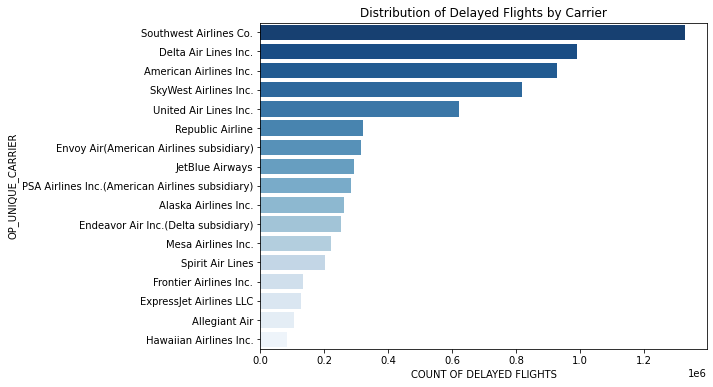

In [13]:
plt.figure(figsize = (8, 6))
_ = sns.barplot(x = delay_by_Carrier['DEP_DEL15'], y = delay_by_Carrier['OP_UNIQUE_CARRIER'], palette = 'Blues_r').set_title('Distribution of Delayed Flights by Carrier')
plt.xlabel('COUNT OF DELAYED FLIGHTS')

## *Distribution of Ontime & Delayed flights by Carrier*

In [14]:
pct_delay_by_Carrier = df.groupby('OP_UNIQUE_CARRIER')['DEP_DEL15'].mean().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
pct_delay_by_Carrier['OP_UNIQUE_CARRIER'] = pct_delay_by_Carrier.OP_UNIQUE_CARRIER.map(carrier_dict)
pct_delay_by_Carrier['DELAYED'] = pct_delay_by_Carrier['DELAYED'] * 100
pct_delay_by_Carrier['ONTIME'] = 100 - pct_delay_by_Carrier['DELAYED']

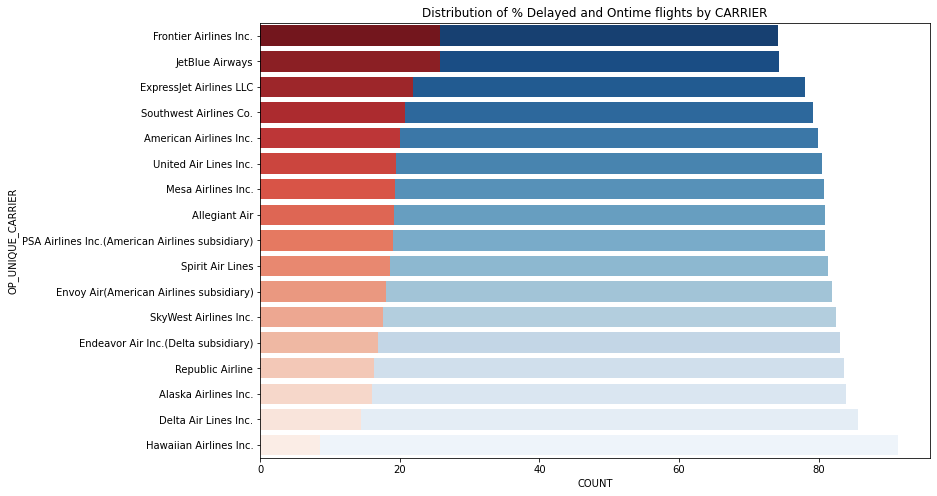

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 8))
delayed_ontime_flight_dist(pct_delay_by_Carrier, 'OP_UNIQUE_CARRIER', 'ONTIME', 'DELAYED', ax1)
_ = ax1.set_title('Distribution of % Delayed and Ontime flights by CARRIER')

*Airlines with highest volumes of flights have most delayed flights like Southwest, Delta. But when we compare the delayed flights of each carrier with total flights handled by each carrier Hawaiian Arlines, Allegiant Air, Frontier are in top. Carrier can be considered as an impotant feature*  

## *Distribution of Delayed Flights by ORIGIN*

In [16]:
# Setting a dictionary of origin airport names for the plot
airport_dict = {'ORD': "Chicago O'Hare", 
                 'ATL': 'Atlanta', 
                 'DFW': 'Dallas/Fort Worth', 
                 'SFO': 'San Francisco', 
                 'DEN': 'Denver', 
                 'EWR': 'Newark',
                 'LGA': 'LaGuardia', 
                 'LAX': 'Los Angeles', 
                 'CLT': 'Charlotte Douglas',
                 'MDW': 'Chicago Midway',
                 'BOS': 'Boston', 
                 'PHX': 'Phoenix Sky Harbor', 
                 'LAS': 'McCarran',
                 'MCO': 'Orlando', 
                 'IAH': 'George Bush Intercontinental', 
                 'DCA': 'Ronald Reagan Washington',
                 'PHL': 'Philadelphia',
                 'MSP': 'Minneapolis−Saint Paul',
                 'JFK': 'John F. Kennedy'}

In [17]:
delay_by_Origin = df.groupby('ORIGIN')['DEP_DEL15'].count().reset_index().sort_values(by = 'DEP_DEL15', ascending = False)
delay_by_Origin['ORIGIN'] = delay_by_Origin.ORIGIN.map(airport_dict)

Text(0.5, 0, 'COUNT OF DELAYED FLIGHTS')

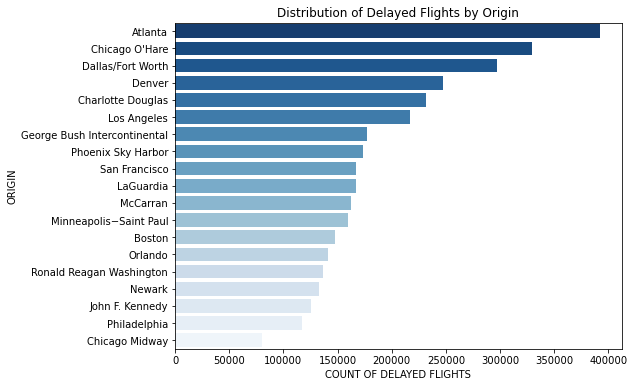

In [18]:
plt.figure(figsize = (8, 6))
_ = sns.barplot(x = delay_by_Origin['DEP_DEL15'], y = delay_by_Origin['ORIGIN'], palette = 'Blues_r').set_title('Distribution of Delayed Flights by Origin')
plt.xlabel('COUNT OF DELAYED FLIGHTS')

## *Distribution of Ontime & Delayed flights by ORIGIN*

In [19]:
pct_delay_by_Origin = df.groupby('ORIGIN')['DEP_DEL15'].mean().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
pct_delay_by_Origin['ORIGIN'] = pct_delay_by_Origin.ORIGIN.map(airport_dict)
pct_delay_by_Origin['DELAYED'] = pct_delay_by_Origin['DELAYED'] * 100
pct_delay_by_Origin['ONTIME'] = 100 - pct_delay_by_Origin['DELAYED']

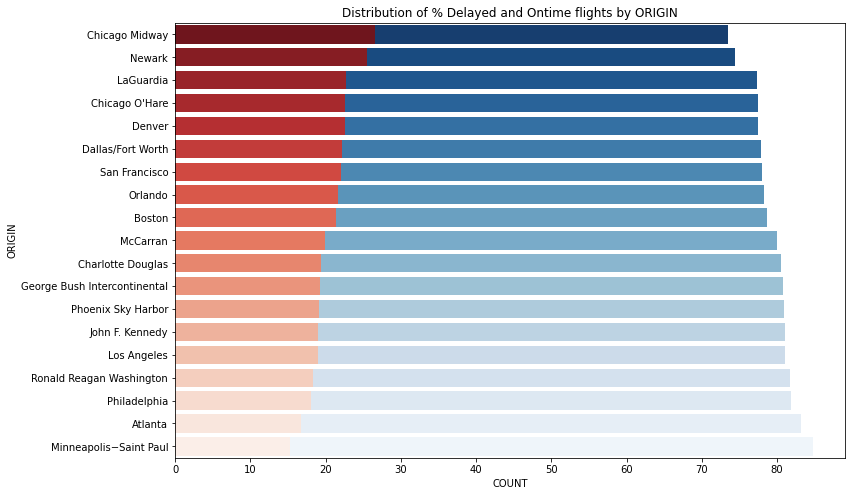

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 8))
delayed_ontime_flight_dist(pct_delay_by_Origin, 'ORIGIN', 'ONTIME', 'DELAYED', ax1)
_ = ax1.set_title('Distribution of % Delayed and Ontime flights by ORIGIN')

*Airports with highest volumes of flights have most delayed flights like Atlanta. But when we compare the delayed flights of each airport with total flights handled by each airport Chicago Midaway is in top. Origin can be considered as an impotant feature*  

## *Distribution of Delayed Flights by QUARTER*

In [21]:
delay_by_Quarter = df.groupby('QUARTER')['DEP_DEL15'].count().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)

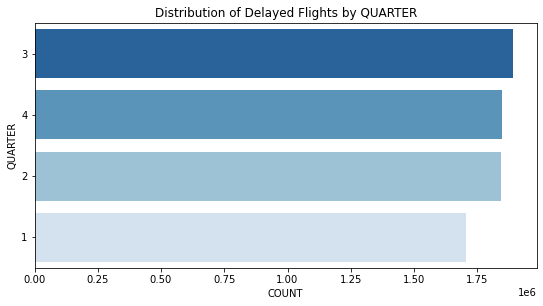

In [22]:
plt.figure(figsize = (9, 4.5))
_ = sns.barplot(x = delay_by_Quarter.DELAYED, 
            y = delay_by_Quarter.QUARTER,
            data = delay_by_Quarter,
            palette = 'Blues_r', 
            orient = 'h',
            order = delay_by_Quarter.sort_values('DELAYED', ascending= False).QUARTER).set_title('Distribution of Delayed Flights by QUARTER')

_ = plt.xlabel('COUNT')

## *Distribution of Ontime & Delayed flights by QUARTER*

In [23]:
pct_delay_by_Quarter = df.groupby('QUARTER')['DEP_DEL15'].mean().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
pct_delay_by_Quarter['DELAYED'] = pct_delay_by_Quarter['DELAYED'] * 100
pct_delay_by_Quarter['ONTIME'] = 100 - pct_delay_by_Quarter['DELAYED']

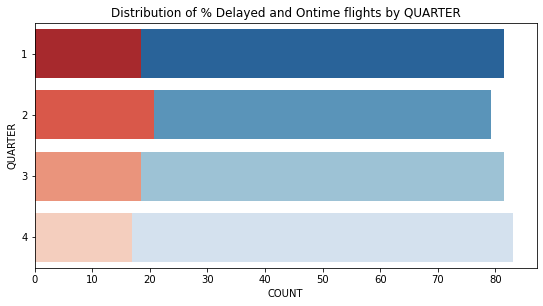

In [24]:
fig, ax2 = plt.subplots(figsize=(9, 4.5))
delayed_ontime_flight_dist(pct_delay_by_Quarter, 'QUARTER', 'ONTIME', 'DELAYED', ax2)
_ = ax2.set_title('Distribution of % Delayed and Ontime flights by QUARTER')

*Quarter 2 has most delayed flights followed by quarter 1 and quarter 3. Quarter might not be an important feature, but further distribution of flights by Month, Day of week can be observed*

## *Distribution of Delayed Flights by MONTH*

In [25]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
              6: 'June', 7: 'July', 8: 'August', 9: 'September', 
              10: 'October', 11: 'November', 12: 'December'}

In [26]:
delay_by_Month = df.groupby('MONTH')['DEP_DEL15'].count().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
delay_by_Month['MONTH'] = delay_by_Month.MONTH.map(month_dict)

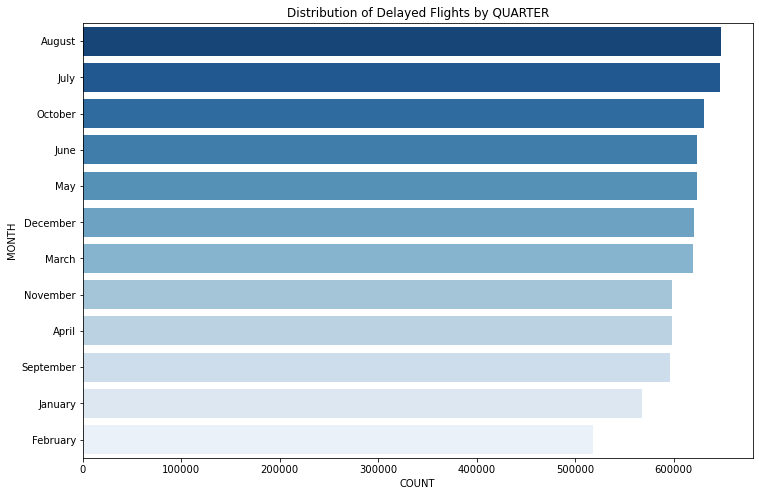

In [27]:
plt.figure(figsize = (12, 8))
_ = sns.barplot(x = delay_by_Month.DELAYED, 
            y = delay_by_Month.MONTH, 
            data = delay_by_Month, 
            palette = 'Blues_r', 
            orient = 'h',
            order = delay_by_Month.sort_values('DELAYED', ascending= False).MONTH).set_title('Distribution of Delayed Flights by QUARTER')
_ = plt.xlabel('COUNT')

## *Distribution of Ontime & Delayed flights by MONTH*

In [28]:
pct_delay_by_Month = df.groupby('MONTH')['DEP_DEL15'].mean().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
pct_delay_by_Month['MONTH'] = pct_delay_by_Month.MONTH.map(month_dict)
pct_delay_by_Month['DELAYED'] = pct_delay_by_Month['DELAYED'] * 100
pct_delay_by_Month['ONTIME'] = 100 - pct_delay_by_Month['DELAYED']

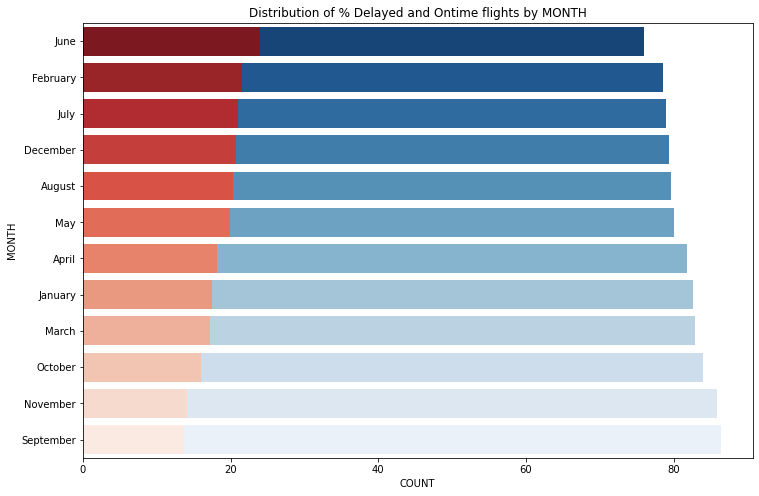

In [29]:
fig, ax2 = plt.subplots(figsize=(12, 8))
delayed_ontime_flight_dist(pct_delay_by_Month, 'MONTH', 'ONTIME', 'DELAYED', ax2)
_ = ax2.set_title('Distribution of % Delayed and Ontime flights by MONTH')

*We see June, July, August having highest number of delays*

## *Distribution of Delayed Flights by DAY_OF_WEEK*

In [30]:
day_dict = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

In [31]:
delay_by_Day = df.groupby('DAY_OF_WEEK')['DEP_DEL15'].count().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
delay_by_Day['DAY_OF_WEEK'] = delay_by_Day.DAY_OF_WEEK.map(day_dict)

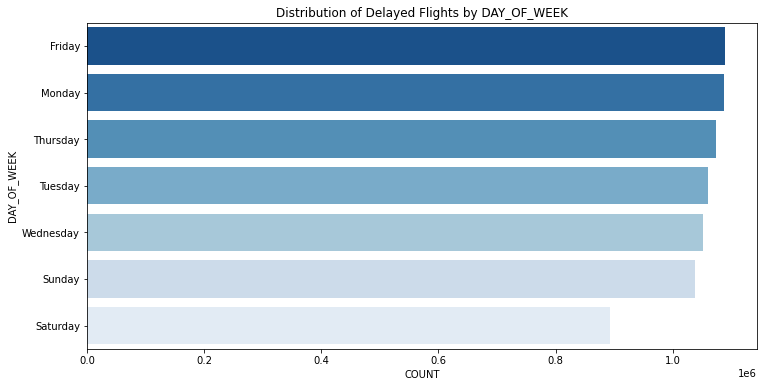

In [32]:
plt.figure(figsize = (12, 6))
_ = sns.barplot(x = delay_by_Day.DELAYED, 
            y = delay_by_Day.DAY_OF_WEEK, 
            data = delay_by_Day, 
            palette = 'Blues_r', 
            orient = 'h',
            order = delay_by_Day.sort_values('DELAYED', ascending= False).DAY_OF_WEEK).set_title('Distribution of Delayed Flights by DAY_OF_WEEK')
_ = plt.xlabel('COUNT')

## *Distribution of Ontime & Delayed flights by DAY_OF_WEEK*

In [33]:
pct_delay_by_Day = df.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
pct_delay_by_Day['DAY_OF_WEEK'] = pct_delay_by_Day.DAY_OF_WEEK.map(day_dict)
pct_delay_by_Day['DELAYED'] = pct_delay_by_Day['DELAYED'] * 100
pct_delay_by_Day['ONTIME'] = 100 - pct_delay_by_Day['DELAYED']

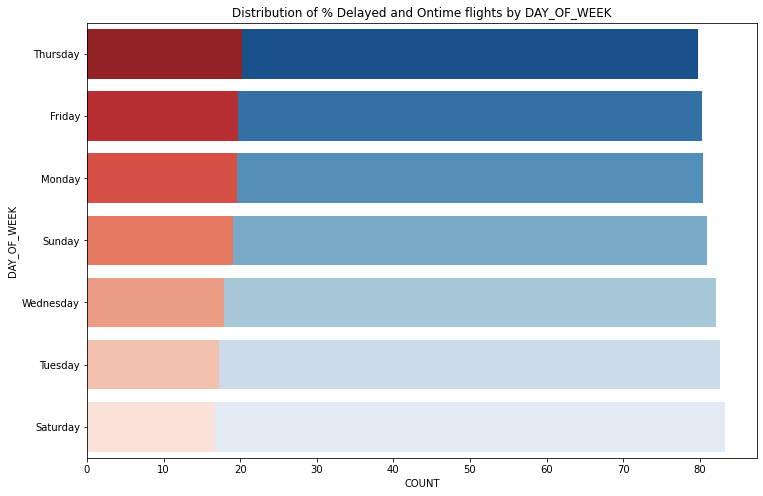

In [34]:
fig, ax3 = plt.subplots(figsize=(12, 8))
delayed_ontime_flight_dist(pct_delay_by_Day, 'DAY_OF_WEEK', 'ONTIME', 'DELAYED', ax3)
_ = ax3.set_title('Distribution of % Delayed and Ontime flights by DAY_OF_WEEK')

*Doesn't give much variance*

### *UniVariate Analysis*

### *Departure Delay Distribution*

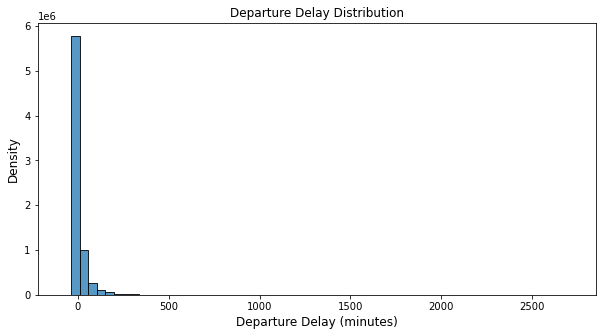

In [35]:
plt.figure(figsize=(10,5));
sns.histplot(df['DEP_DELAY'], bins = 60);
plt.title("Departure Delay Distribution", size=12)
plt.xlabel("Departure Delay (minutes)", size=12)
plt.ylabel("Density", size=12);

### *Flight Duration Distribution*

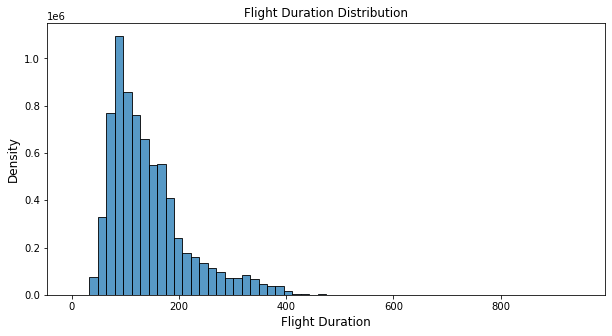

In [36]:
plt.figure(figsize=(10,5));
sns.histplot(df['CRS_ELAPSED_TIME'], bins = 60);
plt.title("Flight Duration Distribution", size=12)
plt.xlabel("Flight Duration", size=12)
plt.ylabel("Density", size=12);

### *Air Time Distribution*

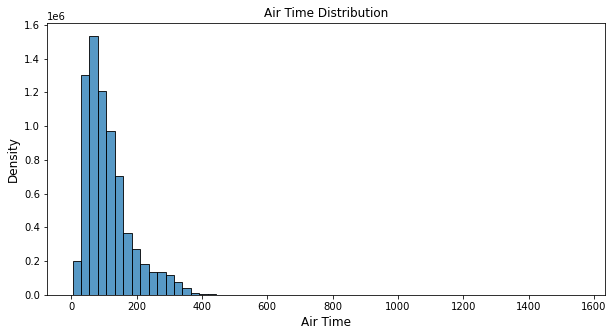

In [37]:
plt.figure(figsize=(10,5));
sns.histplot(df['AIR_TIME'], bins = 60);
plt.title("Air Time Distribution", size=12)
plt.xlabel("Air Time", size=12)
plt.ylabel("Density", size=12);

### *Distance Distribution*

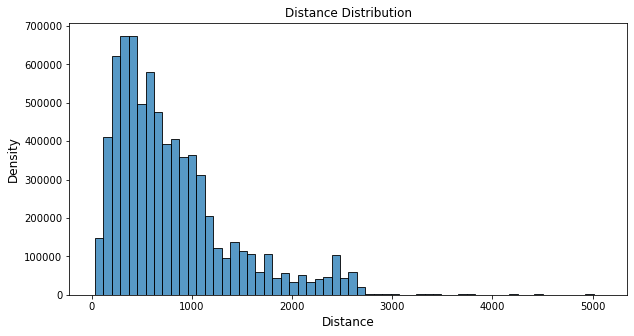

In [38]:
plt.figure(figsize=(10,5));
sns.histplot(df['DISTANCE'], bins = 60);
plt.title("Distance Distribution", size=12)
plt.xlabel("Distance", size=12)
plt.ylabel("Density", size=12);

### *Multivariate Analysis*

### *DELAY vs DISTANCE*

<AxesSubplot:xlabel='DEP_DEL15', ylabel='DISTANCE'>

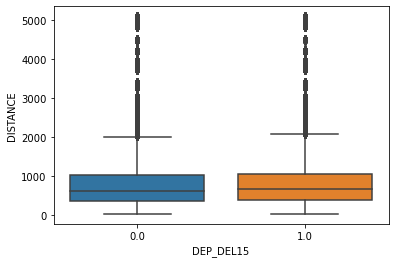

In [39]:
sns.boxplot(x = 'DEP_DEL15', y = 'DISTANCE', data = df)

### *DELAY vs CRS_ELAPSED_TIME*

<AxesSubplot:xlabel='DEP_DEL15', ylabel='CRS_ELAPSED_TIME'>

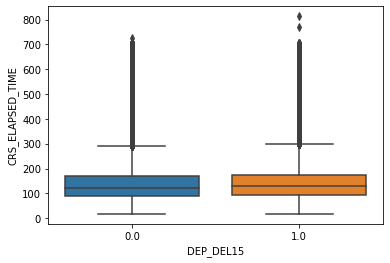

In [40]:
sns.boxplot(x = 'DEP_DEL15', y = 'CRS_ELAPSED_TIME', data = df)

### *DELAY VS AIR TIME*

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AIR_TIME'>

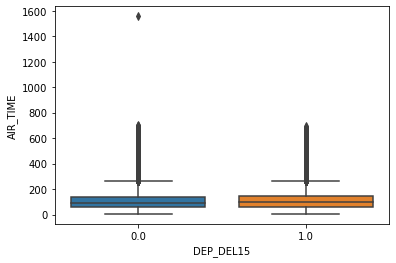

In [41]:
sns.boxplot(x = 'DEP_DEL15', y = 'AIR_TIME', data = df)

In [42]:
df.drop(df[df['AIR_TIME'] > 800].index, inplace = True)

*Elapsed time is 156, the AIR_TIME could be 155 or 157 instead of 1557*

*There are many outliers in DISTANCE, CRS_ELAPSED_TIME, AIR_TIME*

### *Dropping Highly Correlated features*

In [43]:
df.shape

(7421901, 55)

In [44]:
#https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

<AxesSubplot:>

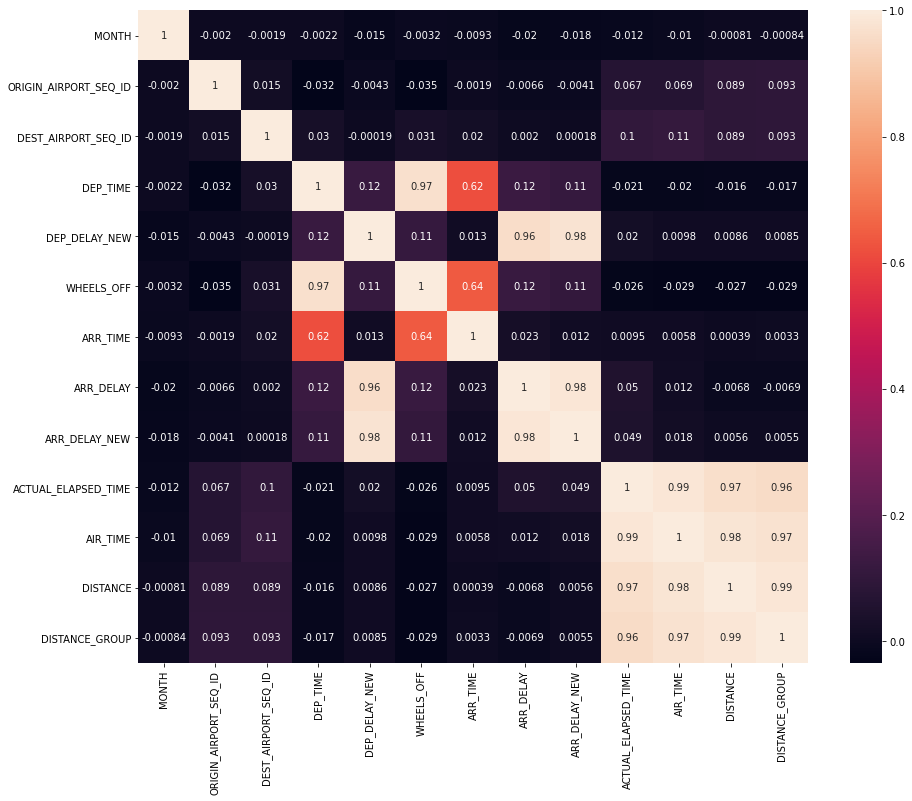

In [45]:
cov_matrix = df[to_drop].corr()
plt.figure(figsize = (15, 12))
sns.heatmap(cov_matrix, annot = True)

In [46]:
# Drop features
to_drop = ['ORIGIN_AIRPORT_SEQ_ID',
         'DEST_AIRPORT_SEQ_ID',
         'WHEELS_OFF',
         'ARR_TIME',
         'ARR_DELAY',
         'ARR_DELAY_NEW',
         'ACTUAL_ELAPSED_TIME',
         'DISTANCE_GROUP']
df.drop(to_drop, axis=1, inplace=True)

In [47]:
df.shape

(7421901, 47)

<AxesSubplot:>

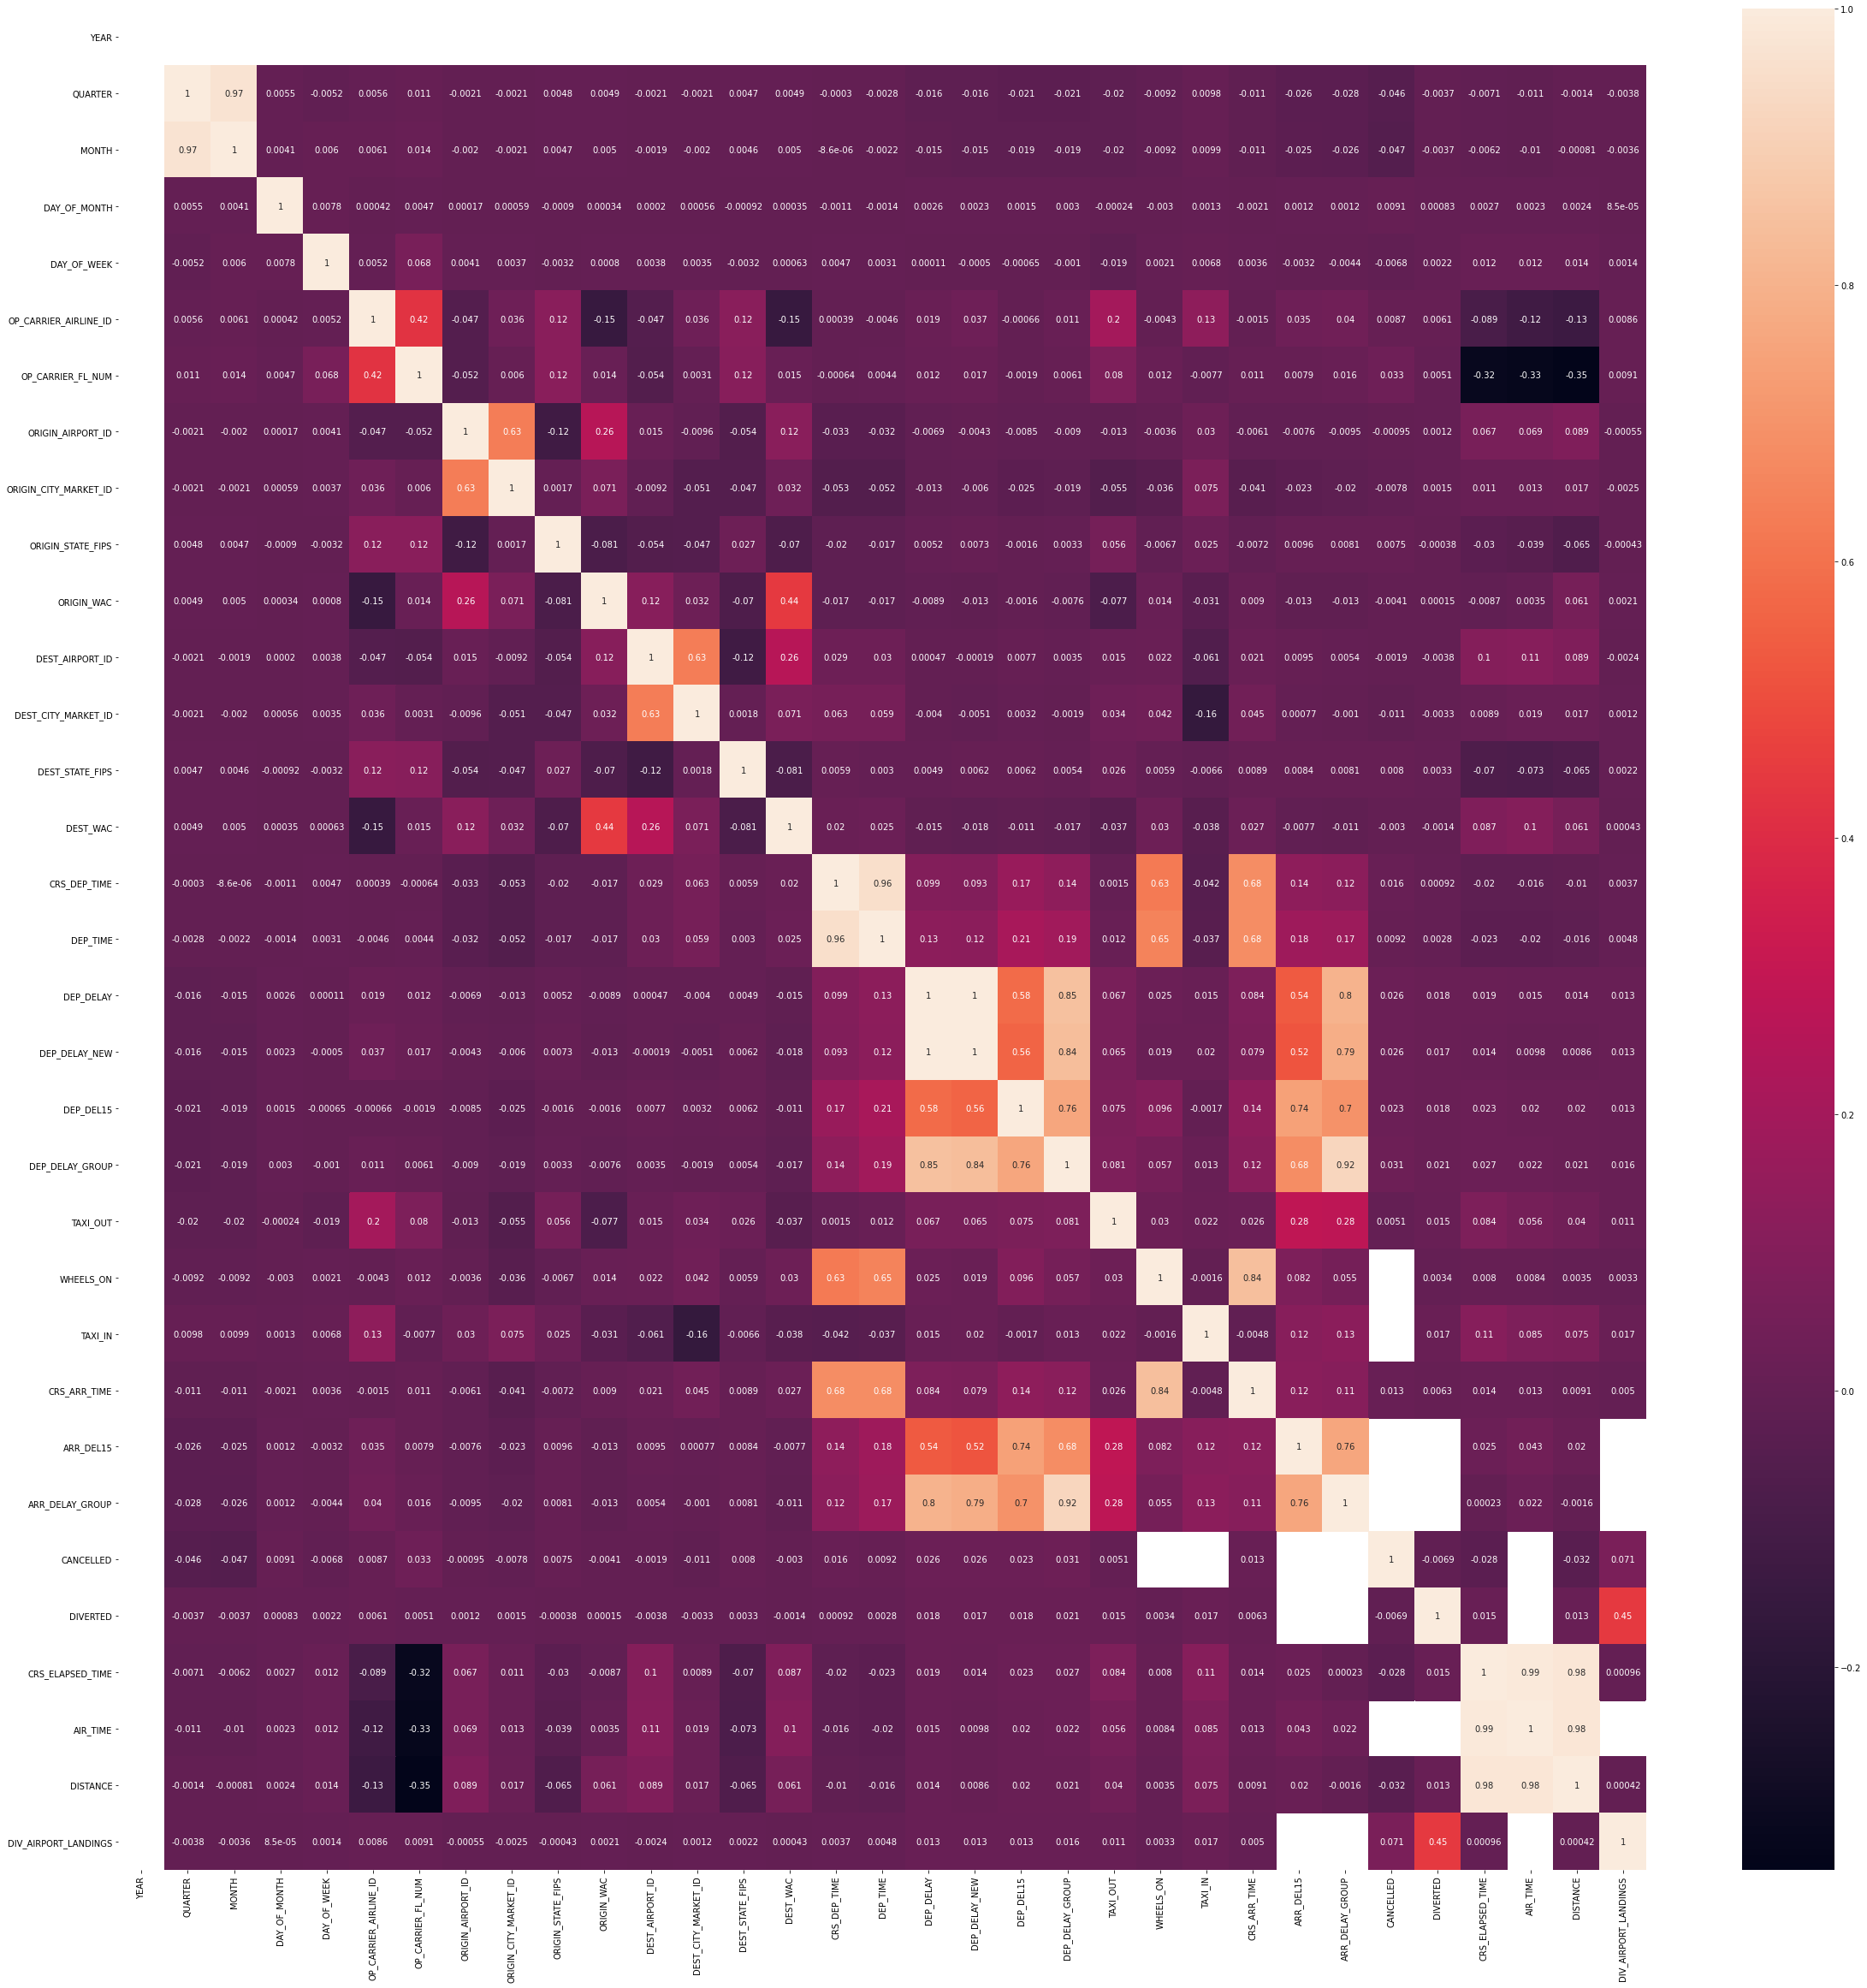

In [48]:
cov_matrix = df.corr()
plt.figure(figsize = (40, 40))
sns.heatmap(cov_matrix, annot = True)

In [49]:
#plt.figure(figsize = (40, 40))
#sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [50]:
df.to_csv('clean_final.csv', index = False)